In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [0]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-xs0ff_fh
All libraries are successfully installed!


In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA4')

In [0]:
import numpy as np
from eva4datatransforms import AlbumentationTransforms
import albumentations as A

channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations

train_transforms = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=4) # fillvalue is 0 after normalizing as mean is 0
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)



# Test Phase transformations
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import eva4dataloaders

dataloader = eva4dataloaders.DataLoader()

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

In [0]:
import numpy as np
dataiter = iter(train_loader)
images, labels = dataiter.next()
i = images[90].numpy()
print(np.max(i), np.min(i))

2.1267893 -1.1373285


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


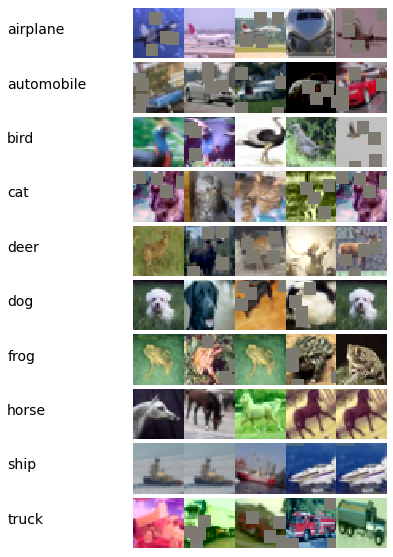

In [0]:
from __future__ import print_function

def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [0]:
import rn 
import torch

model = rn.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
#from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 30
L2lambda = 0
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=L2lambda)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)
L1lambda = 0
model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, True, L1lambda)


Validation loss decreased (100000.000000 --> 1.114227).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0120, Accuracy: 44.37%; Test set: Average loss: 1.1142, Accuracy: 59.80%
Learning Rate = 0.006896



Validation loss decreased (1.114227 --> 0.857790).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0087, Accuracy: 60.91%; Test set: Average loss: 0.8578, Accuracy: 70.08%
Learning Rate = 0.015236



Epoch: 3, Train set: Average loss: 0.0075, Accuracy: 66.86%; Test set: Average loss: 0.9250, Accuracy: 68.86%
Learning Rate = 0.028012



Validation loss decreased (0.857790 --> 0.696393).  Saving model ...
Epoch: 4, Train set: Average loss: 0.0067, Accuracy: 70.38%; Test set: Average loss: 0.6964, Accuracy: 76.53%
Learning Rate = 0.043684



Validation loss decreased (0.696393 --> 0.622965).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0060, Accuracy: 73.65%; Test set: Average loss: 0.6230, Accuracy: 79.66%
Learning Rate = 0.060359



Validation loss decreased (0.622965 --> 0.600134).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0054, Accuracy: 76.35%; Test set: Average loss: 0.6001, Accuracy: 80.29%
Learning Rate = 0.076025



Epoch: 7, Train set: Average loss: 0.0050, Accuracy: 78.21%; Test set: Average loss: 0.6005, Accuracy: 80.63%
Learning Rate = 0.088792



Validation loss decreased (0.600134 --> 0.491788).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0044, Accuracy: 80.32%; Test set: Average loss: 0.4918, Accuracy: 83.79%
Learning Rate = 0.097118



Epoch: 9, Train set: Average loss: 0.0041, Accuracy: 81.97%; Test set: Average loss: 0.5451, Accuracy: 82.45%
Learning Rate = 0.100000



Validation loss decreased (0.491788 --> 0.448583).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0038, Accuracy: 83.34%; Test set: Average loss: 0.4486, Accuracy: 85.71%
Learning Rate = 0.099439



Epoch: 11, Train set: Average loss: 0.0035, Accuracy: 84.37%; Test set: Average loss: 0.4579, Accuracy: 85.54%
Learning Rate = 0.097773



Validation loss decreased (0.448583 --> 0.401709).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0033, Accuracy: 85.51%; Test set: Average loss: 0.4017, Accuracy: 86.96%
Learning Rate = 0.095040



Epoch: 13, Train set: Average loss: 0.0031, Accuracy: 86.37%; Test set: Average loss: 0.4616, Accuracy: 85.57%
Learning Rate = 0.091301



Validation loss decreased (0.401709 --> 0.390061).  Saving model ...
Epoch: 14, Train set: Average loss: 0.0029, Accuracy: 87.30%; Test set: Average loss: 0.3901, Accuracy: 87.48%
Learning Rate = 0.086640



Validation loss decreased (0.390061 --> 0.389235).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0027, Accuracy: 88.14%; Test set: Average loss: 0.3892, Accuracy: 87.19%
Learning Rate = 0.081160



Validation loss decreased (0.389235 --> 0.385894).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0025, Accuracy: 88.69%; Test set: Average loss: 0.3859, Accuracy: 87.93%
Learning Rate = 0.074984



Validation loss decreased (0.385894 --> 0.346046).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0024, Accuracy: 89.44%; Test set: Average loss: 0.3460, Accuracy: 88.52%
Learning Rate = 0.068249



Epoch: 18, Train set: Average loss: 0.0022, Accuracy: 90.02%; Test set: Average loss: 0.3818, Accuracy: 87.96%
Learning Rate = 0.061108



Validation loss decreased (0.346046 --> 0.302830).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0021, Accuracy: 90.64%; Test set: Average loss: 0.3028, Accuracy: 90.00%
Learning Rate = 0.053718



Epoch: 20, Train set: Average loss: 0.0020, Accuracy: 91.22%; Test set: Average loss: 0.3264, Accuracy: 89.38%
Learning Rate = 0.046245



Epoch: 21, Train set: Average loss: 0.0018, Accuracy: 91.85%; Test set: Average loss: 0.3850, Accuracy: 88.83%
Learning Rate = 0.038856



Epoch: 22, Train set: Average loss: 0.0017, Accuracy: 92.47%; Test set: Average loss: 0.3053, Accuracy: 90.48%
Learning Rate = 0.031715



Validation loss decreased (0.302830 --> 0.288120).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0015, Accuracy: 93.18%; Test set: Average loss: 0.2881, Accuracy: 90.82%
Learning Rate = 0.024984



Epoch: 24, Train set: Average loss: 0.0014, Accuracy: 93.68%; Test set: Average loss: 0.3020, Accuracy: 90.64%
Learning Rate = 0.018811



Validation loss decreased (0.288120 --> 0.278493).  Saving model ...
Epoch: 25, Train set: Average loss: 0.0013, Accuracy: 94.34%; Test set: Average loss: 0.2785, Accuracy: 91.81%
Learning Rate = 0.013335



Validation loss decreased (0.278493 --> 0.272328).  Saving model ...
Epoch: 26, Train set: Average loss: 0.0011, Accuracy: 94.94%; Test set: Average loss: 0.2723, Accuracy: 91.80%
Learning Rate = 0.008678



Validation loss decreased (0.272328 --> 0.266717).  Saving model ...
Epoch: 27, Train set: Average loss: 0.0011, Accuracy: 95.31%; Test set: Average loss: 0.2667, Accuracy: 92.02%
Learning Rate = 0.004944



Validation loss decreased (0.266717 --> 0.265146).  Saving model ...
Epoch: 28, Train set: Average loss: 0.0010, Accuracy: 95.84%; Test set: Average loss: 0.2651, Accuracy: 92.20%
Learning Rate = 0.002216



Validation loss decreased (0.265146 --> 0.259077).  Saving model ...
Epoch: 29, Train set: Average loss: 0.0009, Accuracy: 96.07%; Test set: Average loss: 0.2591, Accuracy: 92.33%
Learning Rate = 0.000556



Epoch: 30, Train set: Average loss: 0.0009, Accuracy: 96.12%; Test set: Average loss: 0.2609, Accuracy: 92.27%
Learning Rate = 0.000000



In [0]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

def getimage(img, transform, input_size=(32,32)):
  if img.startswith("http"):
      req = urllib.request.urlopen(img)
      arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
      img = cv2.imdecode(arr, -1) # 'Load it as it is'
  else:
    img = cv2.imread(img, 1)
  
  img = img[:,:, -1::-1]
  
  img = np.uint8(cv2.resize(img, input_size))

  return transform(img)

In [0]:
in_images = [
          (0, 'https://compote.slate.com/images/222e0b84-f164-4fb1-90e7-d20bc27acd8c.jpg'),
          (1, 'https://upload.wikimedia.org/wikipedia/commons/5/5b/Riley_4-68_Riviera_1961.jpg'),
          (2, 'https://s7d2.scene7.com/is/image/PetSmart/ARHERO-NewPetBirdChecklist-20160818?$AR0301$'),
          (3, 'https://i.pinimg.com/originals/b4/89/e5/b489e503ff53b233606638afdbcdd6e7.jpg'),
          (4, 'https://countryroadsmagazine.com/downloads/9580/download/nature-wildlife-wild-deer-horn-mammal-1200530-pxhere.com.jpg?cb=a69366a5022afaf0384a289fb442bc60&w=1200'),
          (5, 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/%22Boxer_dog%22_stand.jpg/1280px-%22Boxer_dog%22_stand.jpg'),
          (6, 'https://i.pinimg.com/originals/60/68/ec/6068ec366b70602acd4b82a5505096fc.jpg'),
          (7, 'https://www.itl.cat/pngfile/big/189-1892019_beautiful-horse-phone-wallpaper-horse-wallpaper-hd-for.jpg'),
          (8, 'https://image.cnbcfm.com/api/v1/image/106042801-1564151441390cruiseshot.png?v=1564168367&w=1400&h=950'),
          (9, 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Bergingstruck_%28tow_truck%29.jpg/1280px-Bergingstruck_%28tow_truck%29.jpg')
]
#
images = []
target_classes = []

for i in in_images:
  images.append(getimage(i[1], test_transforms))
  target_classes.append(i[0])
#class_names = ['airplane','automobile','bird','cat','deer',
#               'dog','frog','horse','ship','truck']

In [0]:
model.load_state_dict(torch.load(f"/content/drive/My Drive/{model.name}.pt"))

<All keys matched successfully>

torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


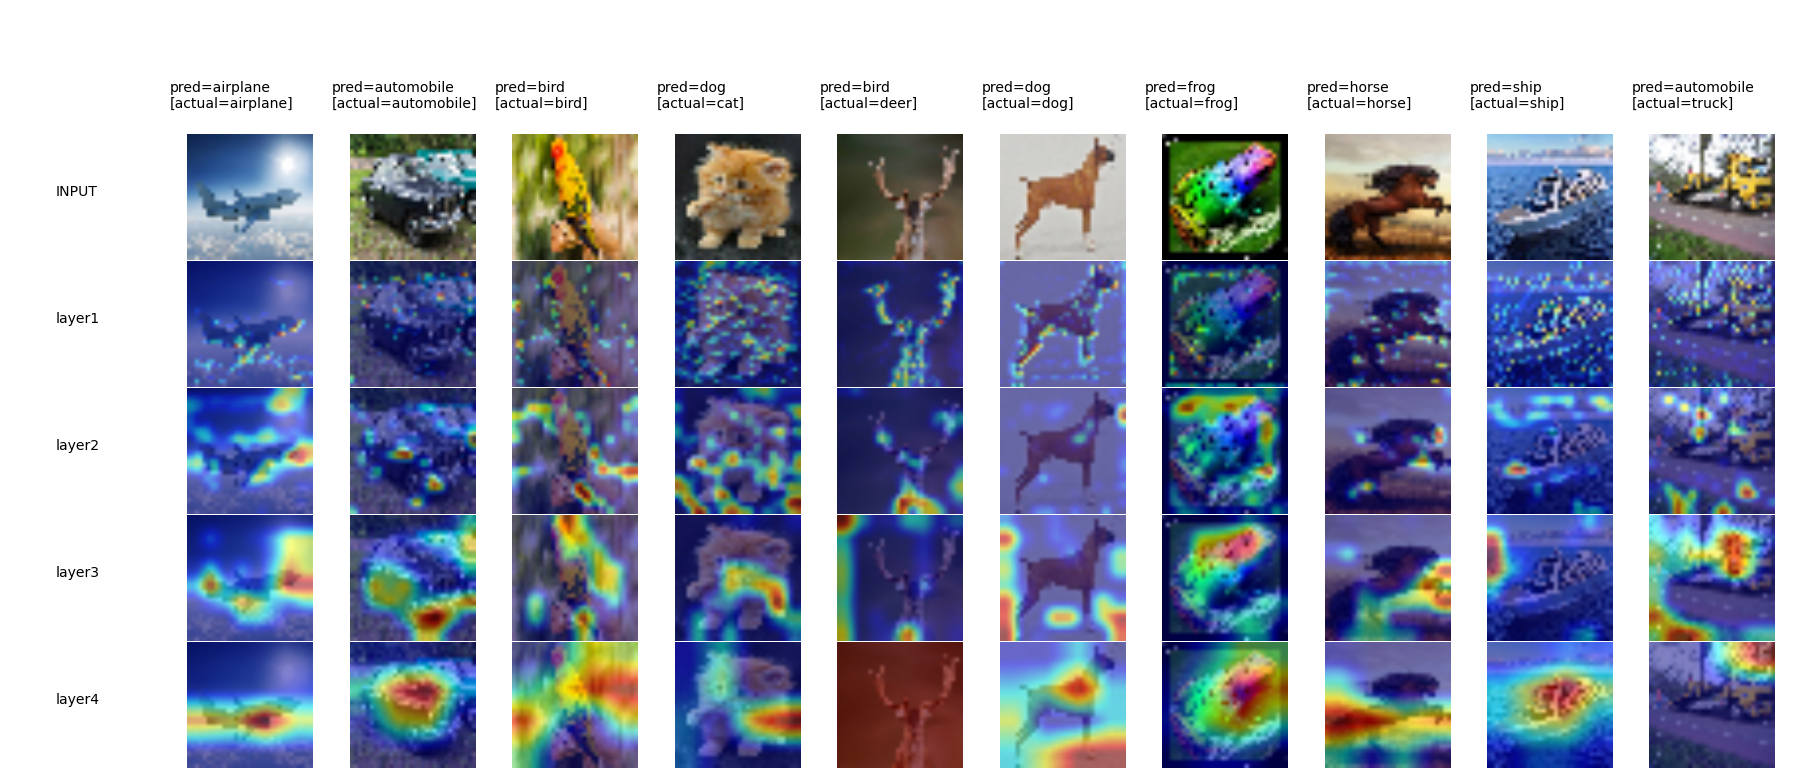

In [0]:
from gradcam import GRADCAM, PLOT
target_layers = [ "layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = GRADCAM(images, target_classes, model, target_layers)
PLOT(gradcam_output, images, target_classes, target_layers, class_names, (3, 32, 32), predicted_classes, unnormalize)